#Data Mining...

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('Employee_Performance_Data.csv') #reading the data

In [4]:
data.head()

,Employee ID,Name,Department,Experience (Years),Salary (USD),Performance Score,Promoted,City,Age,Work Hours per Week,Leaves Taken,Satisfaction Level
0,9953,Austin Ramos,HR,14.0,102410.15,NaN,No,NaN,44.0,NaN,21,0.67
1,5885,Alexis Whitaker,Finance,5.0,97074.51,NaN,No,NaN,NaN,NaN,5,0.90
2,3286,Robert Lopez,Support,20.0,101339.71,70.0,Yes,Youngton,NaN,56.0,24,0.59
3,6187,Samantha Warren,Finance,NaN,76015.04,NaN,No,NaN,NaN,NaN,12,0.64
4,7949,Kristin Thornton,Operations,NaN,51882.43,NaN,No,Marieburgh,36.0,53.0,10,0.71


In [5]:
data.tail()

,Employee ID,Name,Department,Experience (Years),Salary (USD),Performance Score,Promoted,City,Age,Work Hours per Week,Leaves Taken,Satisfaction Level
85,8662,Kathleen Johnson,Support,NaN,43569.99,NaN,Yes,East Aliciaton,NaN,NaN,8,0.33
86,3097,Christina Burch,Marketing,NaN,70936.49,NaN,Yes,NaN,NaN,52.0,9,0.96
87,2526,Phyllis Kelley,Marketing,4.0,93799.48,98.0,No,NaN,NaN,31.0,14,0.74
88,7419,James Lewis,Support,10.0,114237.88,NaN,Yes,NaN,NaN,NaN,0,0.60
89,3644,Amber Everett,Support,NaN,95492.14,NaN,No,East Tammieshire,NaN,NaN,21,0.66


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Employee ID          90 non-null     int64  
 1   Name                 90 non-null     object 
 2   Department           90 non-null     object 
 3   Experience (Years)   40 non-null     float64
 4   Salary (USD)         90 non-null     float64
 5   Performance Score    42 non-null     float64
 6   Promoted             90 non-null     object 
 7   City                 36 non-null     object 
 8   Age                  43 non-null     float64
 9   Work Hours per Week  48 non-null     float64
 10  Leaves Taken         90 non-null     int64  
 11  Satisfaction Level   90 non-null     float64
dtypes: float64(6), int64(2), object(4)
memory usage: 8.6+ KB


By looking the data we can say that this a employe performance data. where it can show all the employee details their performance and leaves taken by them, salary, working hours and even did they are got promotion or not like that details...

here we have 90 employes details of a company and different departments

In [7]:
data.describe()

,Employee ID,Experience (Years),Salary (USD),Performance Score,Age,Work Hours per Week,Leaves Taken,Satisfaction Level
count,90.000000,40.000000,90.000000,42.000000,43.000000,48.000000,90.000000,90.000000
mean,5858.933333,9.375000,75340.091556,78.119048,42.837209,44.125000,12.088889,0.578667
std,2642.970719,5.851528,25941.890002,15.591121,11.912239,9.503919,7.951601,0.250753
min,1063.000000,0.000000,30106.620000,50.000000,21.000000,30.000000,0.000000,0.110000
25%,3644.500000,4.000000,50782.825000,63.250000,35.000000,35.000000,5.000000,0.367500
50%,6069.500000,9.000000,75221.590000,78.000000,44.000000,44.500000,11.500000,0.600000
75%,8082.000000,14.000000,95354.565000,92.500000,53.500000,53.000000,20.000000,0.750000
max,9997.000000,20.000000,119746.390000,100.000000,60.000000,59.000000,25.000000,0.990000


among the employes the average experience is 9 years. and average working hours is 48 hours per week. many more we can see that teir average salary,their performance and more..

In [8]:
data.shape

(90, 12)

In [9]:
data.duplicated().sum() # Checking for duplicated records

0

in our data there is no any duplicated values. and all the records are unique each other

In [10]:
data.isnull().sum() #checking for null values

,0
Employee ID,0
Name,0
Department,0
Experience (Years),50
Salary (USD),0
Performance Score,48
Promoted,0
City,54
Age,47
Work Hours per Week,42


we can see that there are many null values are there. we have to handle them without loosing the data.

Will fill the experience values with the average experience.

In [11]:
#will fill the experience with the average value
data['Experience (Years)'].fillna(data['Experience (Years)'].mean(),inplace=True)

<ipython-input-11-71b256a6d224>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Experience (Years)'].fillna(data['Experience (Years)'].mean(),inplace=True)


In [12]:
#check how the performance is distributed
data.groupby('Department')['Performance Score'].mean()

,Performance Score
Department,
Finance,79.000000
HR,84.333333
IT,75.300000
Marketing,70.666667
Operations,77.777778
Support,81.222222


we can absorve that the performance is varied from each departmet. we will fill the missing data of by each department average performance.

In [13]:
# we can fill the missing values of performance based on each department and their respective average values
data['Performance Score']=data.groupby('Department')['Performance Score'].transform(lambda x: x.fillna(x.mean()))

In [14]:
data['Performance Score'].isnull().sum()

0

In [15]:
data['City'].unique()

array([nan, 'Youngton', 'Marieburgh', 'North Amanda',
       'East Alexandrafort', 'North Derek', 'East Tamara', 'New Nicole',
       'Jenniferside', 'Frazierton', 'Newtonview', 'South Donaldborough',
       'Hamptonberg', 'Nelsonhaven', 'Lake Debra', 'Lake Scottville',
       'Charlottetown', 'Santanashire', 'Nicholasfort', 'Davidborough',
       'North Scott', 'Richardsonfort', 'Michaeltown', 'Hunttown',
       'West Rita', 'Brittanyview', 'West Kevin', 'Meganmouth',
       'Port Samanthaburgh', 'East Lisa', 'North Peggyhaven', 'Garyfort',
       'Lake Craigshire', 'South Jodi', 'Williamsonton', 'East Aliciaton',
       'East Tammieshire'], dtype=object)

we can see that there are more citys are there. we can replace the missing citys by most frequently occured city names. instead of that replacing with 'Other' is the Better way.


In [16]:
data['City'].fillna('Other',inplace=True)

<ipython-input-16-c9d464635716>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['City'].fillna('Other',inplace=True)


In [17]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Work Hours per Week'].fillna(data['Work Hours per Week'].mean(),inplace=True)

<ipython-input-17-0d6cc0e7a0b2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True)
<ipython-input-17-0d6cc0e7a0b2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [18]:
data.isnull().sum()

,0
Employee ID,0
Name,0
Department,0
Experience (Years),0
Salary (USD),0
Performance Score,0
Promoted,0
City,0
Age,0
Work Hours per Week,0


now there is no any null values. and no duplicat values. it is ready for analysis now.

# Data Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data.columns

Index(['Employee ID', 'Name', 'Department', 'Experience (Years)',
       'Salary (USD)', 'Performance Score', 'Promoted', 'City', 'Age',
       'Work Hours per Week', 'Leaves Taken', 'Satisfaction Level'],
      dtype='object')

### Univariate Analysis

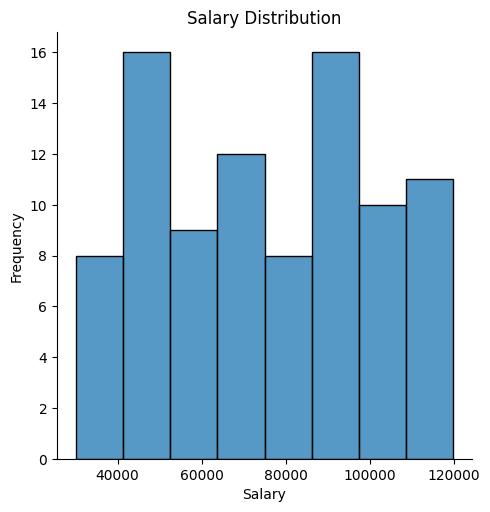

In [26]:
sns.displot(data['Salary (USD)'])
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

<ipython-input-27-827f15e7d829>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary (USD)'])


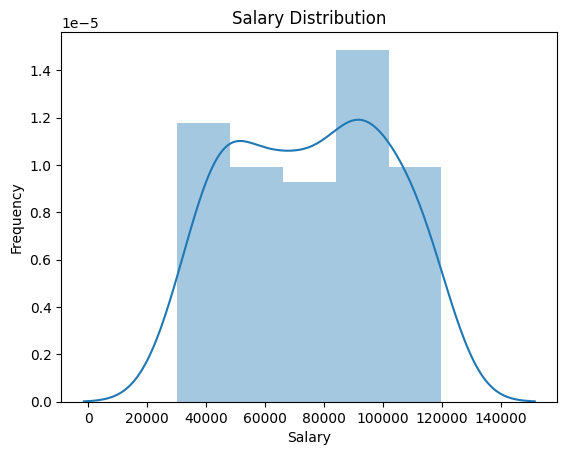

In [27]:
sns.distplot(data['Salary (USD)'])
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


from the above we can see that hoe the salary distributed...

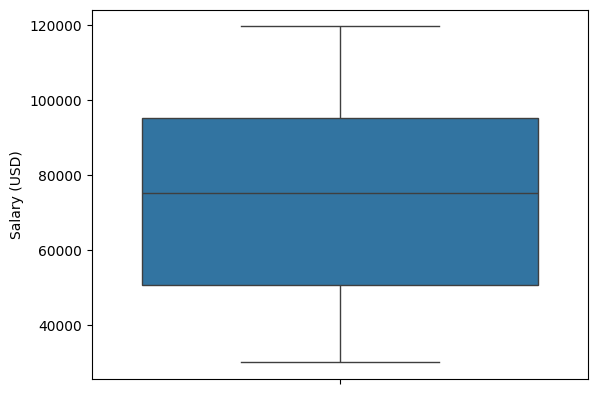

In [29]:
# let us check is there any outliers
sns.boxplot(data['Salary (USD)'])
plt.show()

There is no any outliers

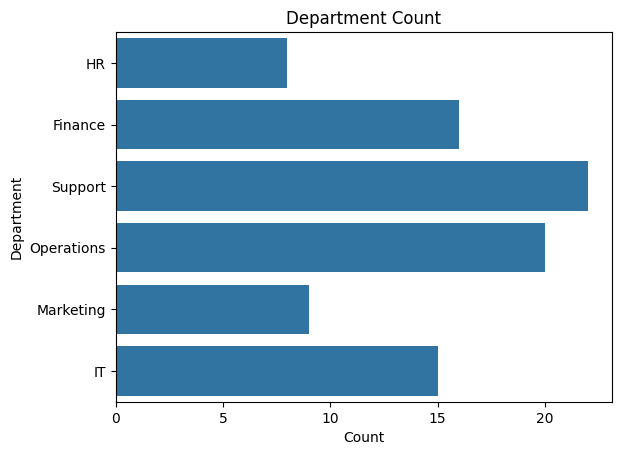

In [31]:
sns.countplot(data['Department'])
plt.title('Department Count')
plt.ylabel('Department')
plt.xlabel('Count')
plt.show()

we can see that different departments and their count. suport and operations department has high..

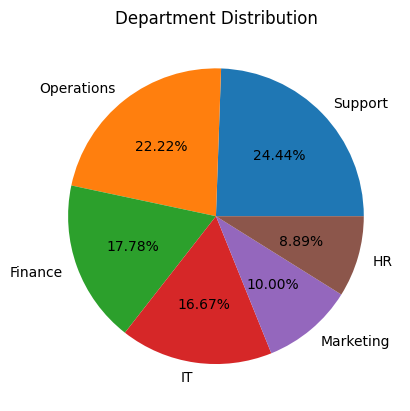

In [37]:
plt.pie(data['Department'].value_counts(),labels=data['Department'].value_counts().index,autopct='%1.2f%%')
plt.title('Department Distribution')
plt.show()

here we can say the HR and Marketing Departments has less distribution and support and operations departments have high

### Bivariate Analysis

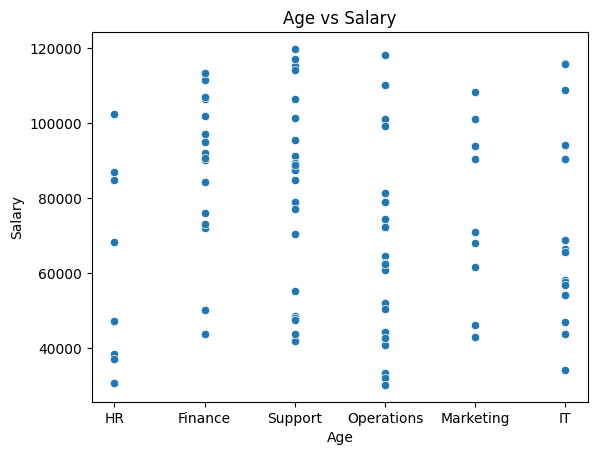

In [43]:
sns.scatterplot(data=data,x='Department',y='Salary (USD)')
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

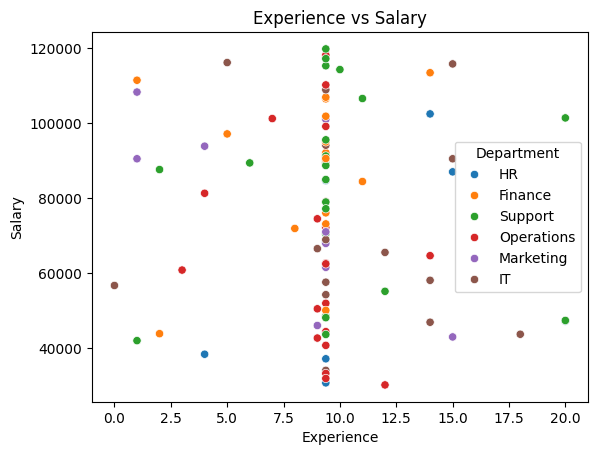

In [45]:
sns.scatterplot(data=data,x='Experience (Years)',y='Salary (USD)',hue='Department')
plt.title('Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

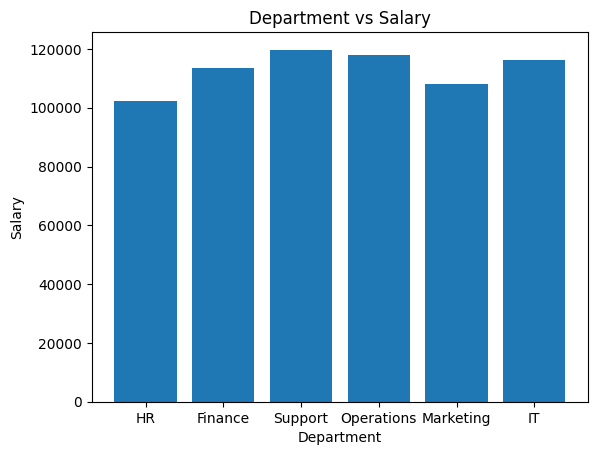

In [46]:
plt.bar(data['Department'],data['Salary (USD)'])
plt.title('Department vs Salary')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.show()


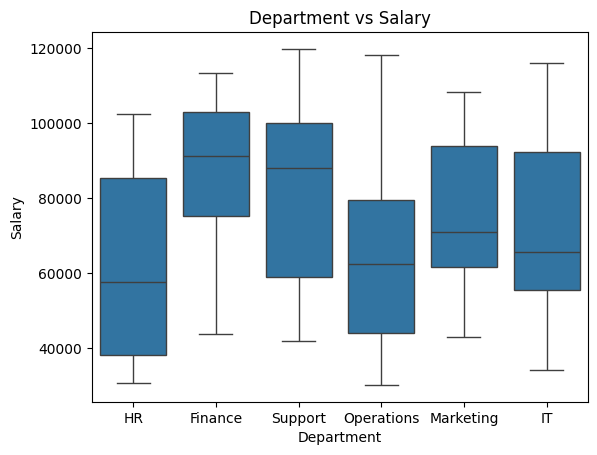

In [53]:
sns.boxplot(data=data,x='Department',y='Salary (USD)')
plt.title('Department vs Salary')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.show()

here we can see the salary ranges from the each department. finance department is having high salary range

<BarContainer object of 6 artists>

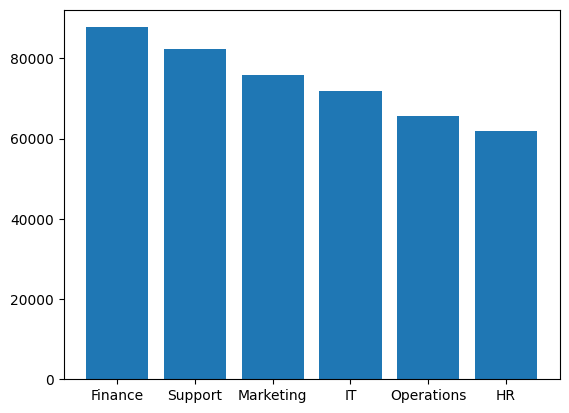

In [57]:
#depart ment which is having high average salary
data.groupby('Department')['Salary (USD)'].mean().sort_values(ascending=False)
plt.bar(data.groupby('Department')['Salary (USD)'].mean().sort_values(ascending=False).index,data.groupby('Department')['Salary (USD)'].mean().sort_values(ascending=False))

Finance and Support Departments are having the high average salarys

<BarContainer object of 6 artists>

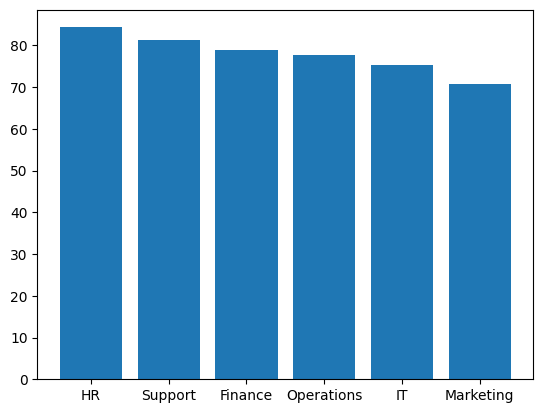

In [58]:
#employees with highest performance
data.groupby('Department')['Performance Score'].mean().sort_values(ascending=False)
plt.bar(data.groupby('Department')['Performance Score'].mean().sort_values(ascending=False).index,data.groupby('Department')['Performance Score'].mean().sort_values(ascending=False))


But in HR department employes are having high performance comparing with other departments

This notebook demonstrates a detailed Exploratory Data Analysis (EDA) on employee data, covering key aspects like salary, performance scores, and department-wise analysis. Various data cleaning techniques were applied, including handling missing values, and visualizations were created to understand trends and patterns across different variables. Key insights, such as salary distribution and departmental statistics, were highlighted.

Thank you for reviewing this analysis